## Assignment - Evolutionary Computation

#### (Natural Computing, RU Nijmegen)

### Question 6: 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
#if t=2, binary tournement selection

x_len = 50
y_len = 2
N = 100 

In [32]:
def genetic_algorithm_simpleEA(N, max_iters, tour_size=2):
    #without localsearch

    init_population = pop_init(N)
    init_fitness = fitness_list(init_population)
    
    population = init_population
    fitnesses = init_fitness

    avg_fit = []

    for i in range(max_iters):
        selection_pool = tour_selection(population, fitnesses, N, tour_size)
        #print("mating_pool")

        new_pop = offspring_crossover(selection_pool)
        N = len(new_pop)
        #print("crossover")
        
        population = mutation(new_pop)
        #print("mutation")
        
        fitnesses = fitness_list(population)

        avg_fit.append(np.mean(fitnesses))

    plt.plot(range(max_iters), avg_fit)
    plt.xlabel("Iterations")
    plt.ylabel("Average fitness")
    plt.title("Average fitness of the Simple EA (without local search) and tour size %d" % tour_size)
    plt.show()
    
    optimal_fit = min(fitnesses)
    optimal_solution = population[np.argmin(fitnesses)]

    print("Solution found of ", optimal_solution, ", best fitness is ", optimal_fit)
    return optimal_solution

def genetic_algorithm_memetic(N, max_iters, tour_size=2):
    #with local search

    init_population = pop_init(N)
    init_fitness = fitness_list(init_population)
    
    population = init_population
    fitnesses = init_fitness

    init_population = local_search(init_population) 

    avg_fit = []

    for i in range(max_iters):
        selection_pool = tour_selection(population, fitnesses, N, tour_size)
        #print("mating_pool")

        new_pop = offspring_crossover(selection_pool)
        N = len(new_pop)
        #print("crossover")
        
        population = mutation(new_pop)
        #print("mutation")

        population = local_search(population)
        
        fitnesses = fitness_list(population)

        avg_fit.append(np.mean(fitnesses))

    plt.plot(range(max_iters), avg_fit)
    plt.xlabel("Iterations")
    plt.ylabel("Average fitness")
    plt.title("Average fitness of the memetic algorithm (with local search) and tour size %d" % tour_size)
    plt.show()
    
    optimal_fit = min(fitnesses)
    optimal_solution = population[np.argmin(fitnesses)]

    print("Solution found of ", optimal_solution, ", best fitness is ", optimal_fit)
    return optimal_solution

def swap_points(route, cutpoint):
    result = route
    result[cutpoint[0]:(cutpoint[1])] = list(reversed(route[cutpoint[0]:cutpoint[1]]))
    return result       

def local_search(pop):
    new_result = []
    for i in range(len(pop)):
        pop_i = pop[i]
        cutpoint = [1,1]
        dist = [0,0]

        for i in range(len(pop_i)-1):
            dist_i = distance_coord(pop_i[i], pop_i[i+1])
            if dist_i > min(dist[0], dist[1]):
                if dist[0] < dist[1]:
                    dist[0] = dist_i
                    cutpoint[0] = i
                else:
                    dist[1] = dist_i
                    cutpoint[1] = i
        if cutpoint[1] < cutpoint[0]:
            z = cutpoint[0]
            cutpoint[0] = cutpoint[1]
            cutpoint[1] = z
            
        tot_distance = dist[0] + dist[1]
        new_distance = distance_coord(pop_i[cutpoint[1]], pop_i[cutpoint[0]+1])
        new_distance += distance_coord(pop_i[cutpoint[0]], pop_i[cutpoint[1]+1])

        if new_distance < tot_distance:
            pop_i = swap_points(pop_i, cutpoint)
            pop[i] = pop_i
                    
    return pop

def check_fill(value):
    if value > (x_len-1):
        point = 0
    else:
        point = value
    return point

def crossover_points(length):
    points = [1,1]
    while points[0] == points[1]:
        points[0] = random.randint(0, length)
        points[1] = random.randint(0, length)
    if points[1] < points[0]:
        z = points[1]
        points[1] = points[0]
        points[0] = z
    return points

def offspring_crossover(pop):
    crossover = []

    while (len(pop)>1):
        pop_0 = pop[-1]
        del pop[-1]
        pop_1 = pop[-1]
        del pop[-1]

        cutpoints = crossover_points(len(pop_0))

        crosspoint0 = pop_0[cutpoints[0]:cutpoints[1]]
        crosspoint1 = pop_1[cutpoints[0]:cutpoints[1]]

        offspring0 = np.ones(x_len, dtype=int)*-1
        offspring1 = np.ones(x_len, dtype=int)*-1

        for i in range(cutpoints[0], cutpoints[1]):
            offspring0[i] = pop_0[i]
            offspring1[i] = pop_1[i]

        crossover_length =  cutpoints[1] - cutpoints[0]
        cross_over_check = x_len - crossover_length

        off_p_0 = (offspring0, pop_1)
        off_p_1 = (offspring1, pop_0)

        for i, j in [off_p_0,off_p_1]:
            point_offspring = check_fill(cutpoints[1])
            point_p = check_fill(cutpoints[1])
            
            for w in range(cross_over_check):
                while j[point_p] in i:
                    point_p = check_fill(point_p+1)
                i[point_offspring] = j[point_p] 
                
                point_offspring = check_fill(point_offspring+1)
                point_p = check_fill(point_p+1)

        crossover.append(offspring0)
        crossover.append(offspring1)
    crossover = np.array(crossover)
    return crossover

def mutation(pop):
    for i in range(len(pop)):
        swap = np.random.randint(0,x_len,size=2)
        z = pop[i][swap[0]]
        pop[i][swap[0]] = pop[i][swap[1]] 
        pop[i][swap[1]] = z
    return pop

def tour_selection(pop, fit, N, t):
    new_pop = []
    for i in range(N):
        pop_list = random.choices(pop, k=t)
        result = fitness_list(pop_list)
        new_pop.append(pop_list[np.argmin(result)])
    return new_pop

def fitness_list(list_pop):
    list_fit = []
    for c in list_pop:
        list_fit.append(cand_fitness(c))
    return np.array(list_fit)

def distance_coord(x,y):
    x1 = txt[x]
    x2 = txt[y]
    return math.sqrt(((x1[0]-x2[0])**2)+((x1[1]-x2[1])**2))

def cand_fitness(candidate):
    x = 0
    for i in range(1,len(candidate)):
        x += distance_coord(candidate[i-1], candidate[i])
    return x

def pop_init(i,n=x_len):
    pop = np.empty((i,n), dtype=int)
    for j in range(i):
        pop[j] = np.random.permutation(n)
    return pop

def read_txt(txt):
    coords_city = np.empty((x_len,y_len))
    with open(txt, "r") as file_tsp:
        lines = file_tsp.readlines()
    n_lines = len(lines)
    for i in range(n_lines):
        line_i = lines[i].splitlines()
        coord_i = line_i[0].split()
        coords_city[i] = [float(j) for j in coord_i]
    return coords_city

In [33]:

coords_tsp = read_txt("file-tsp.txt")
txt = coords_tsp

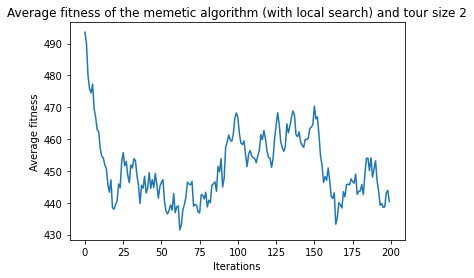

Solution found of  [46  3 47 34 30 45 43 27 38 18 17 26 20  9  7 32 41 33  6  4  2 14 23 22
 11  8  0 24 36 37 40 39 13 12 28 15 19 10 16 25  5 31 35 42 49 48 44 21
 29  1] , best fitness is  375.4865525555427


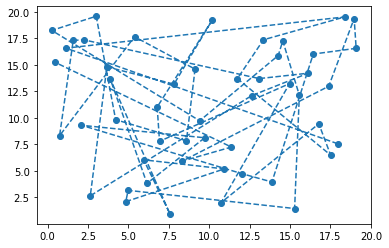

In [22]:
#Memetic with binary tournement selection
bintour_memetic_solution = genetic_algorithm_memetic(N, max_iters=200)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in bintour_memetic_solution]
[y.append(coords_tsp[i][1]) for i in bintour_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

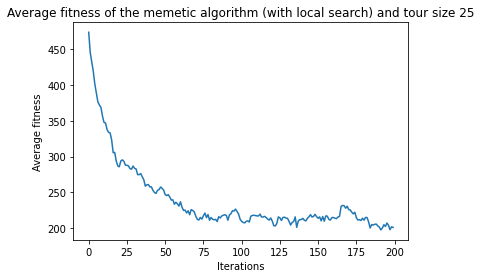

Solution found of  [ 8  0  4  3  1  2  5 18 15 12 16 13  7 19 21 35 28 31 27 39 45 46 43 38
 44 49 48 47 34 36 42 41 40 33 24 25 22 29 32 37 30 26 23 14  6  9 10 11
 17 20] , best fitness is  157.6552299592787


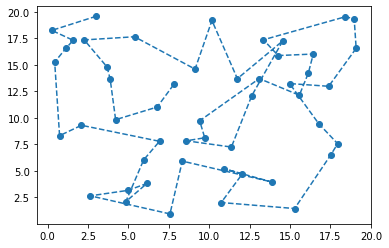

In [23]:
#Memetic with tournement selection (25)
tour_memetic_solution = genetic_algorithm_memetic(N, max_iters=200, tour_size = 25)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_memetic_solution]
[y.append(coords_tsp[i][1]) for i in tour_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

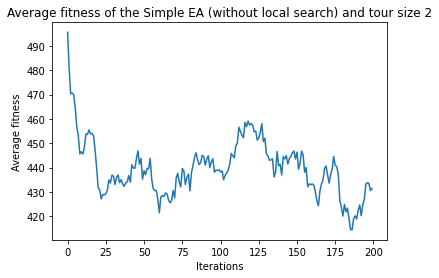

Solution found of  [25 46 40 38 37 48 41 27  7 35 16  2 22 45 24 29 31  8  0 20 26 42 47  3
  5  4  6 23 14  1 12 39 28 19 13  9 17 36 10 32 18 33 34 44 43 11 21 15
 49 30] , best fitness is  365.0038475347832


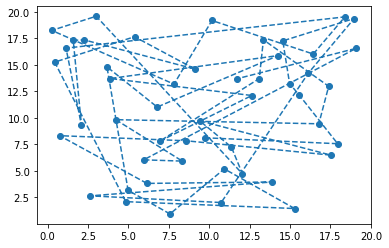

In [24]:
#Simple EA with binary tournement selection
bintour_EA_solution = genetic_algorithm_simpleEA(N, max_iters=200)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in bintour_EA_solution]
[y.append(coords_tsp[i][1]) for i in bintour_EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

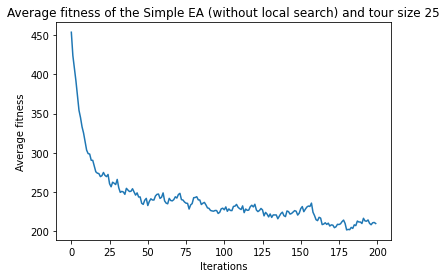

Solution found of  [29 18 24 22 11 10  1  0  3  6  4 14  8  9  5  2 16 21 28 19 27 39 35 45
 46 43 31 25 12 13  7 15 17 20 23 49 47 48 26 36 37 34 41 44 42 38 40 30
 33 32] , best fitness is  172.28024503607315


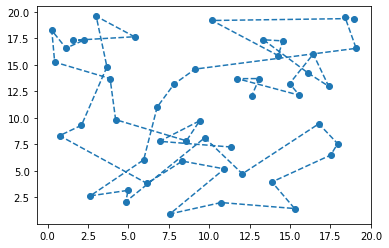

In [34]:
#Simple EA with tournement selection (25)
tour_EA_solution = genetic_algorithm_simpleEA(N, max_iters=200, tour_size=25)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_EA_solution]
[y.append(coords_tsp[i][1]) for i in tour_EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

## Small instance of our choice
http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html
,used berlin-52.tsp

In [35]:
#Small instance of our choice

def read_txt_instance(txt):
    coords_city = np.empty((x_len,y_len))
    with open(txt, "r") as file_tsp:
        lines = file_tsp.readlines()
    n_lines = len(lines)
    for i in range(n_lines):
        line_i = lines[i].splitlines()
        coord_i = line_i[0].split()
        coord_i = coord_i[1:3]
        coords_city[i] = [float(j) for j in coord_i]
    return coords_city

In [36]:
berlin52_tsp = read_txt_instance("berlin52-tsp.txt")
txt = berlin52_tsp

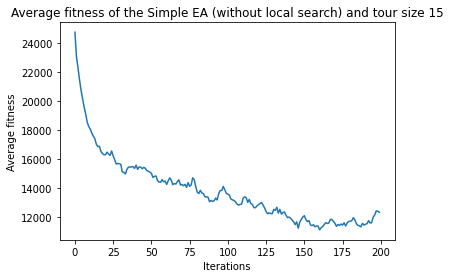

Solution found of  [ 5 38 37 32 42  9  8  7 40 18 44 34 15 43  2 16 20  6  1 41 29 28 46 25
 27 26 13 12 10 11 36 33 47 23 49  0 19 22 30 17 31 48 21 39 35 24 45  3
 14  4] , best fitness is  10274.676298177745


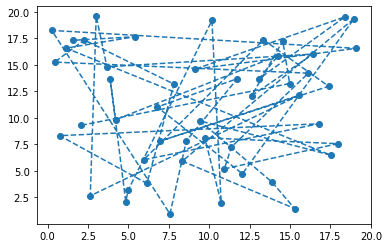

In [38]:
instance_simpleEA_solution = genetic_algorithm_simpleEA(N, max_iters=200, tour_size=15)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in instance_simpleEA_solution]
[y.append(coords_tsp[i][1]) for i in instance_simpleEA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

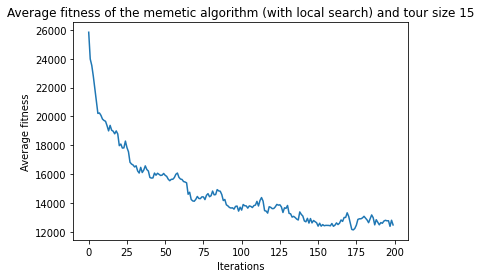

Solution found of  [ 6  1 41 20 16 35 39 47  3 24 29 30 17  2  7  9  8 40 18 44 31 22 45 33
 36  4  5 14  0 48 23 43 37 42 32 10 11 27 26 12 13 46 25 15 28 49 19 21
 38 34] , best fitness is  10318.40518599761


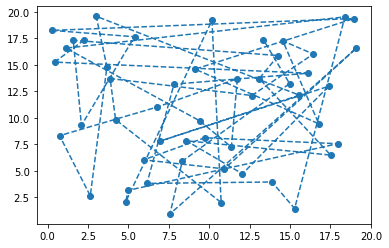

In [29]:
instance_memetic_solution = genetic_algorithm_memetic(N, max_iters=200, tour_size=15)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in instance_memetic_solution]
[y.append(coords_tsp[i][1]) for i in instance_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a99332b8-5d3d-47fa-8230-1d208927ff84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>